In [1]:
import re

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [1]:
#Some of the code has been adapted from the following kaggle notebook: https://www.kaggle.com/code/pavlofesenko/minimizing-risks-for-loan-investments

In [4]:
df = pd.read_csv('C:/Users/Imran/OneDrive - Ontario Tech University/Documents/Capstone/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv')

C:\Users\Imran\AppData\Local\Temp\ipykernel_11768\280022276.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/Imran/OneDrive - Ontario Tech University/Documents/Capstone/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv')


In [9]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df['issue_d']

0          Dec-2015
1          Dec-2015
2          Dec-2015
3          Dec-2015
4          Dec-2015
             ...   
2260696    Oct-2016
2260697    Oct-2016
2260698    Oct-2016
2260699         NaN
2260700         NaN
Name: issue_d, Length: 2260701, dtype: object

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [24]:
column_names = list(df)


In [26]:
print(column_names)

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq',

In [42]:
#Dictionary which has the usable feature names for each use case
LoanStats = pd.read_excel("C:/Users/Imran/OneDrive - Ontario Tech University/Documents/Capstone/LCDataDictionary.xlsx",
                         sheet_name = 0) 

C:\Users\Imran\anaconda3\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [44]:
LoanStats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LoanStatNew  78 non-null     object
 1   Description  79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [48]:
LoanStats_features = LoanStats['LoanStatNew'].dropna().values
LoanStats_features = [re.sub('(?<![0-9_])(?=[A-Z0-9])', '_', x).lower().strip() for x in LoanStats_features]

In [50]:
data_feat = df.columns.values
np.setdiff1d(LoanStats_features, data_feat)

array(['is_inc_v', 'open_il_6m', 'verified_status_joint'], dtype='<U27')

In [52]:
np.setdiff1d(data_feat, LoanStats_features)


array(['acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'deferral_term', 'delinq_amnt',
       'disbursement_method', 'hardship_amount', 'hardship_dpd',
       'hardship_end_date', 'hardship_flag',
       'hardship_last_payment_amount', 'hardship_length',
       'hardship_loan_status', 'hardship_payoff_balance_amount',
       'hardship_reason', 'hardship_start_date', 'hardship_status',
       'hardship_type', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
       'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats',
       'num_tl_120dpd_2m', 'num_tl_30dpd', 'num

In [54]:
check = np.setdiff1d(data_feat, LoanStats_features)


In [56]:
np.count_nonzero(check)

76

In [58]:
#Creating a dataframe which has all required features
avail_feat = np.intersect1d(LoanStats_features, data_feat)
X = df[avail_feat].copy()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 75 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   acc_now_delinq               float64
 1   addr_state                   object 
 2   all_util                     float64
 3   annual_inc                   float64
 4   annual_inc_joint             float64
 5   application_type             object 
 6   collection_recovery_fee      float64
 7   collections_12_mths_ex_med   float64
 8   delinq_2yrs                  float64
 9   desc                         object 
 10  dti                          float64
 11  dti_joint                    float64
 12  earliest_cr_line             object 
 13  emp_length                   object 
 14  emp_title                    object 
 15  fico_range_high              float64
 16  fico_range_low               float64
 17  funded_amnt                  float64
 18  funded_amnt_inv              float64
 19  

In [59]:
X.head()

,acc_now_delinq,addr_state,all_util,annual_inc,annual_inc_joint,application_type,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,desc,...,total_bal_il,total_cu_tl,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,url,zip_code
0,0.0,PA,34.0,55000.0,NaN,Individual,0.0,0.0,0.0,NaN,...,4981.0,1.0,4421.723917,4421.72,821.72,0.0,3600.00,9300.0,https://lendingclub.com/browse/loanDetail.acti...,190xx
1,0.0,SD,29.0,65000.0,NaN,Individual,0.0,0.0,1.0,NaN,...,18005.0,0.0,25679.660000,25679.66,979.66,0.0,24700.00,111800.0,https://lendingclub.com/browse/loanDetail.acti...,577xx
2,0.0,IL,65.0,63000.0,71000.0,Joint App,0.0,0.0,0.0,NaN,...,10827.0,5.0,22705.924294,22705.92,2705.92,0.0,20000.00,14000.0,https://lendingclub.com/browse/loanDetail.acti...,605xx
3,0.0,NJ,45.0,110000.0,NaN,Individual,0.0,0.0,0.0,NaN,...,12609.0,1.0,31464.010000,31464.01,12361.66,0.0,19102.35,67300.0,https://lendingclub.com/browse/loanDetail.acti...,076xx
4,0.0,PA,78.0,104433.0,NaN,Individual,0.0,0.0,1.0,NaN,...,73839.0,1.0,11740.500000,11740.50,1340.50,0.0,10400.00,34000.0,https://lendingclub.com/browse/loanDetail.acti...,174xx


In [21]:
num_columns = X.shape[1]
print(f"Number of columns: {num_columns}")

Number of columns: 75


In [22]:
app_types = df['application_type'].unique()
print(app_types)

['Individual' 'Joint App' nan]


In [23]:
btime_value = X.loc[0, 'application_type']
print("Value in the first row of 'apptype':", btime_value)

Value in the first row of 'apptype': Individual


In [24]:
column_dtype = X.loc[:, 'application_type'].dtype
print("Data type of the second column:", column_dtype)

Data type of the second column: object


In [62]:
app_column = X.loc[:,'application_type']
app_column

0          Individual
1          Individual
2           Joint App
3          Individual
4          Individual
              ...    
2260696    Individual
2260697    Individual
2260698    Individual
2260699           NaN
2260700           NaN
Name: application_type, Length: 2260701, dtype: object

In [27]:
import sys

In [70]:
column_name = 'application_type'

# Count the number of rows with NaN values in the specified column
num_nan_rows = df[column_name].isnull().sum()

print(f"Number of rows with NaN values in '{column_name}': {num_nan_rows}")

Number of rows with NaN values in 'application_type': 33


In [78]:
#I need to remove all rows with over 5% nan values
max_thresh = 0.05
threshold = max_thresh*X.shape[1]

In [82]:
X_clean = X.dropna(thresh=threshold)

In [142]:
pd.set_option('display.max_columns', None)  # Show all columns

In [88]:
from pandas.api.types import is_datetime64_any_dtype as is_datetime

In [102]:
#Checking to see if dates are formatted correctly
if is_datetime(X_clean['earliest_cr_line']):
    print("'date_col' is of type datetime")
else:
    print("'date_col' is not of type datetime")

'date_col' is of type datetime


In [104]:
X_clean[["earliest_cr_line", "issue_d", "last_credit_pull_d", "last_pymnt_d", "next_pymnt_d"]] = X_clean[
    ["earliest_cr_line", "issue_d", "last_credit_pull_d", "last_pymnt_d", "next_pymnt_d"]].apply(
    pd.to_datetime)


C:\Users\Imran\AppData\Local\Temp\ipykernel_11768\650569688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_clean[["earliest_cr_line", "issue_d", "last_credit_pull_d", "last_pymnt_d", "next_pymnt_d"]] = X_clean[


In [108]:
#Check the different types of terms
app_types = df['term'].unique()
print(app_types)

[' 36 months' ' 60 months' nan]


In [110]:
from sklearn.preprocessing import OrdinalEncoder

In [112]:
encoder = OrdinalEncoder()

In [114]:
#Ordinal encoding app type (individual or joint)
X_clean['application_type_OrdinalEncoded'] = encoder.fit_transform(X_clean[['application_type']])

print(X_clean)

C:\Users\Imran\AppData\Local\Temp\ipykernel_11768\832785503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_clean['application_type_OrdinalEncoded'] = encoder.fit_transform(X_clean[['application_type']])


         acc_now_delinq addr_state  all_util  annual_inc  annual_inc_joint  \
0                   0.0         PA      34.0     55000.0               NaN   
1                   0.0         SD      29.0     65000.0               NaN   
2                   0.0         IL      65.0     63000.0           71000.0   
3                   0.0         NJ      45.0    110000.0               NaN   
4                   0.0         PA      78.0    104433.0               NaN   
...                 ...        ...       ...         ...               ...   
2260694             0.0         AL     103.0     95000.0               NaN   
2260695             0.0         UT      59.0    108000.0               NaN   
2260696             0.0         CA      51.0    227000.0               NaN   
2260697             0.0         FL      73.0    110000.0               NaN   
2260698             0.0         TX      84.0     95000.0               NaN   

        application_type  collection_recovery_fee  collections_

In [116]:
#Ordinal encoding term type (36 or 60)

X_clean['term_OrdinalEncoded'] = encoder.fit_transform(X_clean[['term']])

X_clean

C:\Users\Imran\AppData\Local\Temp\ipykernel_11768\1386406315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_clean['term_OrdinalEncoded'] = encoder.fit_transform(X_clean[['term']])


,acc_now_delinq,addr_state,all_util,annual_inc,annual_inc_joint,application_type,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,desc,...,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,url,zip_code,application_type_OrdinalEncoded,term_OrdinalEncoded
0,0.0,PA,34.0,55000.0,NaN,Individual,0.0,0.0,0.0,NaN,...,4421.723917,4421.72,821.72,0.00,3600.00,9300.0,https://lendingclub.com/browse/loanDetail.acti...,190xx,0.0,0.0
1,0.0,SD,29.0,65000.0,NaN,Individual,0.0,0.0,1.0,NaN,...,25679.660000,25679.66,979.66,0.00,24700.00,111800.0,https://lendingclub.com/browse/loanDetail.acti...,577xx,0.0,0.0
2,0.0,IL,65.0,63000.0,71000.0,Joint App,0.0,0.0,0.0,NaN,...,22705.924294,22705.92,2705.92,0.00,20000.00,14000.0,https://lendingclub.com/browse/loanDetail.acti...,605xx,1.0,1.0
3,0.0,NJ,45.0,110000.0,NaN,Individual,0.0,0.0,0.0,NaN,...,31464.010000,31464.01,12361.66,0.00,19102.35,67300.0,https://lendingclub.com/browse/loanDetail.acti...,076xx,0.0,1.0
4,0.0,PA,78.0,104433.0,NaN,Individual,0.0,0.0,1.0,NaN,...,11740.500000,11740.50,1340.50,0.00,10400.00,34000.0,https://lendingclub.com/browse/loanDetail.acti...,174xx,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260694,0.0,AL,103.0,95000.0,NaN,Individual,0.0,0.0,0.0,NaN,...,15760.500000,15760.50,6047.89,0.00,9712.61,50500.0,https://lendingclub.com/browse/loanDetail.acti...,356xx,0.0,1.0
2260695,0.0,UT,59.0,108000.0,NaN,Individual,0.0,0.0,0.0,NaN,...,15008.530000,15008.53,4959.95,0.00,10048.58,55600.0,https://lendingclub.com/browse/loanDetail.acti...,840xx,0.0,1.0
2260696,0.0,CA,51.0,227000.0,NaN,Individual,0.0,0.0,7.0,NaN,...,24903.930000,24903.93,8156.52,0.00,16747.41,13300.0,https://lendingclub.com/browse/loanDetail.acti...,907xx,0.0,1.0
2260697,0.0,FL,73.0,110000.0,NaN,Individual,0.0,0.0,0.0,NaN,...,6755.400000,6755.40,3233.49,0.00,3521.91,25900.0,https://lendingclub.com/browse/loanDetail.acti...,334xx,0.0,1.0


In [118]:
X_clean['initial_list_status_OrdinalEncoded'] = encoder.fit_transform(X_clean[
    ['initial_list_status']])

X_clean

C:\Users\Imran\AppData\Local\Temp\ipykernel_11768\585852151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_clean['initial_list_status_OrdinalEncoded'] = encoder.fit_transform(X_clean[


,acc_now_delinq,addr_state,all_util,annual_inc,annual_inc_joint,application_type,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,desc,...,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,url,zip_code,application_type_OrdinalEncoded,term_OrdinalEncoded,initial_list_status_OrdinalEncoded
0,0.0,PA,34.0,55000.0,NaN,Individual,0.0,0.0,0.0,NaN,...,4421.72,821.72,0.00,3600.00,9300.0,https://lendingclub.com/browse/loanDetail.acti...,190xx,0.0,0.0,1.0
1,0.0,SD,29.0,65000.0,NaN,Individual,0.0,0.0,1.0,NaN,...,25679.66,979.66,0.00,24700.00,111800.0,https://lendingclub.com/browse/loanDetail.acti...,577xx,0.0,0.0,1.0
2,0.0,IL,65.0,63000.0,71000.0,Joint App,0.0,0.0,0.0,NaN,...,22705.92,2705.92,0.00,20000.00,14000.0,https://lendingclub.com/browse/loanDetail.acti...,605xx,1.0,1.0,1.0
3,0.0,NJ,45.0,110000.0,NaN,Individual,0.0,0.0,0.0,NaN,...,31464.01,12361.66,0.00,19102.35,67300.0,https://lendingclub.com/browse/loanDetail.acti...,076xx,0.0,1.0,1.0
4,0.0,PA,78.0,104433.0,NaN,Individual,0.0,0.0,1.0,NaN,...,11740.50,1340.50,0.00,10400.00,34000.0,https://lendingclub.com/browse/loanDetail.acti...,174xx,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260694,0.0,AL,103.0,95000.0,NaN,Individual,0.0,0.0,0.0,NaN,...,15760.50,6047.89,0.00,9712.61,50500.0,https://lendingclub.com/browse/loanDetail.acti...,356xx,0.0,1.0,0.0
2260695,0.0,UT,59.0,108000.0,NaN,Individual,0.0,0.0,0.0,NaN,...,15008.53,4959.95,0.00,10048.58,55600.0,https://lendingclub.com/browse/loanDetail.acti...,840xx,0.0,1.0,0.0
2260696,0.0,CA,51.0,227000.0,NaN,Individual,0.0,0.0,7.0,NaN,...,24903.93,8156.52,0.00,16747.41,13300.0,https://lendingclub.com/browse/loanDetail.acti...,907xx,0.0,1.0,0.0
2260697,0.0,FL,73.0,110000.0,NaN,Individual,0.0,0.0,0.0,NaN,...,6755.40,3233.49,0.00,3521.91,25900.0,https://lendingclub.com/browse/loanDetail.acti...,334xx,0.0,1.0,0.0


In [120]:
from sklearn.preprocessing import OneHotEncoder

In [122]:
hotencoder = OneHotEncoder()


In [128]:
id_column = X_clean['id']

In [62]:
#def check_dataframe(var):
    if isinstance(var, pd.DataFrame):
        print("The variable is a Pandas DataFrame.")
    else:
        print("The variable is not a Pandas DataFrame.")

In [130]:
id_column

0          68407277
1          68355089
2          68341763
3          66310712
4          68476807
             ...   
2260694    89885898
2260695    88977788
2260696    88985880
2260697    88224441
2260698    88215728
Name: id, Length: 2260668, dtype: object

In [132]:
# Correcting format of emp length column
X_clean['emp_length'] = X_clean['emp_length'].replace({'< 1 year': '0 years', '10+ years': '11 years'})
X_clean['emp_length'] = X_clean['emp_length'].str.extract('(\d+)').astype('float')


C:\Users\Imran\AppData\Local\Temp\ipykernel_11768\458133300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_clean['emp_length'] = X_clean['emp_length'].replace({'< 1 year': '0 years', '10+ years': '11 years'})
C:\Users\Imran\AppData\Local\Temp\ipykernel_11768\458133300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_clean['emp_length'] = X_clean['emp_length'].str.extract('(\d+)').astype('float')


In [124]:
home_ownership_array = hotencoder.fit_transform(X_clean[['home_ownership']]).toarray()
home_ownership_features = hotencoder.get_feature_names_out(['home_ownership'])
home_ownership_df = pd.DataFrame(home_ownership_array, columns=home_ownership_features)


In [148]:
home_clean = pd.merge(id_column,home_ownership_df, left_index= True, right_index= True )

In [154]:
purpose_array = hotencoder.fit_transform(X_clean[['purpose']]).toarray()
purpose_features = hotencoder.get_feature_names_out(['purpose'])
purpose_df = pd.DataFrame(purpose_array, columns=purpose_features)

In [158]:
purpose_clean = pd.merge(id_column,purpose_df, left_index= True, right_index= True )

In [162]:
#Check the different types of employment titles
emp_types = df['emp_title'].unique()
print(emp_types)

['leadman' 'Engineer' 'truck driver' ... 'Sr. Photo Producer'
 'Exec Dir Internal Audit' 'Current Operations Officer']


In [172]:
emp_types_count = df['emp_title'].nunique()
print(emp_types_count)

35


In [166]:
#dropping due to high variability for categorical columns
X_clean = X_clean.drop(['url', 'emp_title'], axis=1, errors='ignore')


In [174]:
#Dropped title due to high variability, subgrade due to high correlation to grade
X_clean = X_clean.drop(['title', 'sub_grade'], axis=1, errors='ignore')


In [180]:
test_x = X_clean
test_x

,acc_now_delinq,addr_state,all_util,annual_inc,annual_inc_joint,application_type,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,desc,dti,dti_joint,earliest_cr_line,emp_length,fico_range_high,fico_range_low,funded_amnt,funded_amnt_inv,grade,home_ownership,id,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,last_pymnt_amnt,last_pymnt_d,loan_amnt,loan_status,max_bal_bc,member_id,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,next_pymnt_d,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,policy_code,pub_rec,purpose,pymnt_plan,recoveries,revol_bal,revol_util,term,tot_coll_amt,tot_cur_bal,total_acc,total_bal_il,total_cu_tl,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,zip_code,application_type_OrdinalEncoded,term_OrdinalEncoded,initial_list_status_OrdinalEncoded
0,0.0,PA,34.0,55000.0,NaN,Individual,0.0,0.0,0.0,NaN,5.91,NaN,2003-08-01,11.0,679.0,675.0,3600.0,3600.0,C,MORTGAGE,68407277,36.0,w,3.0,4.0,1.0,123.03,13.99,2015-12-01,2019-03-01,564.0,560.0,122.67,2019-01-01,3600.0,Fully Paid,722.0,NaN,30.0,30.0,NaN,21.0,NaT,7.0,2.0,0.0,1.0,3.0,3.0,0.00,0.00,1.0,0.0,debt_consolidation,n,0.0,2765.0,29.7,36 months,722.0,144904.0,13.0,4981.0,1.0,4421.723917,4421.72,821.72,0.00,3600.00,9300.0,190xx,0.0,0.0,1.0
1,0.0,SD,29.0,65000.0,NaN,Individual,0.0,0.0,1.0,NaN,16.06,NaN,1999-12-01,11.0,719.0,715.0,24700.0,24700.0,C,MORTGAGE,68355089,73.0,w,0.0,6.0,4.0,820.28,11.99,2015-12-01,2019-03-01,699.0,695.0,926.35,2016-06-01,24700.0,Fully Paid,6472.0,NaN,6.0,NaN,NaN,19.0,NaT,22.0,1.0,0.0,1.0,2.0,3.0,0.00,0.00,1.0,0.0,small_business,n,0.0,21470.0,19.2,36 months,0.0,204396.0,38.0,18005.0,0.0,25679.660000,25679.66,979.66,0.00,24700.00,111800.0,577xx,0.0,0.0,1.0
2,0.0,IL,65.0,63000.0,71000.0,Joint App,0.0,0.0,0.0,NaN,10.78,13.85,2000-08-01,11.0,699.0,695.0,20000.0,20000.0,B,MORTGAGE,68341763,73.0,w,2.0,1.0,0.0,432.66,10.78,2015-12-01,2019-03-01,704.0,700.0,15813.30,2017-06-01,20000.0,Fully Paid,2081.0,NaN,NaN,NaN,NaN,19.0,NaT,6.0,0.0,0.0,4.0,0.0,2.0,0.00,0.00,1.0,0.0,home_improvement,n,0.0,7869.0,56.2,60 months,0.0,189699.0,18.0,10827.0,5.0,22705.924294,22705.92,2705.92,0.00,20000.00,14000.0,605xx,1.0,1.0,1.0
3,0.0,NJ,45.0,110000.0,NaN,Individual,0.0,0.0,0.0,NaN,17.06,NaN,2008-09-01,11.0,789.0,785.0,35000.0,35000.0,C,MORTGAGE,66310712,70.0,w,0.0,0.0,0.0,829.90,14.85,2015-12-01,2019-03-01,679.0,675.0,829.90,2019-02-01,35000.0,Current,6987.0,NaN,NaN,NaN,NaN,23.0,2019-04-01,13.0,1.0,0.0,1.0,1.0,1.0,15897.65,15897.65,1.0,0.0,debt_consolidation,n,0.0,7802.0,11.6,60 months,0.0,301500.0,17.0,12609.0,1.0,31464.010000,31464.01,12361.66,0.00,19102.35,67300.0,076xx,0.0,1.0,1.0
4,0.0,PA,78.0,104433.0,NaN,Individual,0.0,0.0,1.0,NaN,25.37,NaN,1998-06-01,3.0,699.0,695.0,10400.0,10400.0,F,MORTGAGE,68476807,84.0,w,2.0,3.0,3.0,289.91,22.45,2015-12-01,2018-03-01,704.0,700.0,10128.96,2016-07-01,10400.0,Fully Paid,9702.0,NaN,12.0,NaN,NaN,14.0,NaT,12.0,1.0,0.0,3.0,4.0,7.0,0.00,0.00,1.0,0.0,major_purchase,n,0.0,21929.0,64.5,60 months,0.0,331730.0,35.0,73839.0,1.0,11740.500000,11740.50,1340.50,0.00,10400.00,34000.0,174xx,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260694,0.0,AL,103.0,95000.0,NaN,Individual,0.0,0.0,0.0,NaN,19.61,NaN,1999-12-01,7.0,669.0,665.0,24000.0,24000.0,C,MORTGAGE,89885898,106.0,f,1.0,1.0,0.0,543.50,12.79,2016-10-01,2019-03-01,709.0,705.0,543.50,2019-03-01,24000.0,Current,0.0,NaN,NaN,NaN,NaN,3.0,2019-04-01,5.0,2.0,1.0,3.0,2.0,2.0,14287.39,14287.39,1.0,0.0,home_improvement,n,0.0,49431.0,84.4,60 months,0.0,104422.0,54.0,54991.0,19.0,15760.500000,1

In [186]:
test_final = test_x

In [188]:
#test_final = pd.merge(test_final, emp_clean, on='id')
test_final = pd.merge(test_final, home_clean, on='id')
test_final = pd.merge(test_final, purpose_clean, on='id')

In [192]:
test_final['initial_list_status']

0          w
1          w
2          w
3          w
4          w
          ..
2260632    f
2260633    f
2260634    f
2260635    f
2260636    f
Name: initial_list_status, Length: 2260637, dtype: object

In [189]:
test_final

,acc_now_delinq,addr_state,all_util,annual_inc,annual_inc_joint,application_type,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,desc,dti,dti_joint,earliest_cr_line,emp_length,fico_range_high,fico_range_low,funded_amnt,funded_amnt_inv,grade,home_ownership,id,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,last_pymnt_amnt,last_pymnt_d,loan_amnt,loan_status,max_bal_bc,member_id,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,next_pymnt_d,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,policy_code,pub_rec,purpose,pymnt_plan,recoveries,revol_bal,revol_util,term,tot_coll_amt,tot_cur_bal,total_acc,total_bal_il,total_cu_tl,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,zip_code,application_type_OrdinalEncoded,term_OrdinalEncoded,initial_list_status_OrdinalEncoded,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0.0,PA,34.0,55000.0,NaN,Individual,0.0,0.0,0.0,NaN,5.91,NaN,2003-08-01,11.0,679.0,675.0,3600.0,3600.0,C,MORTGAGE,68407277,36.0,w,3.0,4.0,1.0,123.03,13.99,2015-12-01,2019-03-01,564.0,560.0,122.67,2019-01-01,3600.0,Fully Paid,722.0,NaN,30.0,30.0,NaN,21.0,NaT,7.0,2.0,0.0,1.0,3.0,3.0,0.00,0.00,1.0,0.0,debt_consolidation,n,0.0,2765.0,29.7,36 months,722.0,144904.0,13.0,4981.0,1.0,4421.723917,4421.72,821.72,0.00,3600.00,9300.0,190xx,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,SD,29.0,65000.0,NaN,Individual,0.0,0.0,1.0,NaN,16.06,NaN,1999-12-01,11.0,719.0,715.0,24700.0,24700.0,C,MORTGAGE,68355089,73.0,w,0.0,6.0,4.0,820.28,11.99,2015-12-01,2019-03-01,699.0,695.0,926.35,2016-06-01,24700.0,Fully Paid,6472.0,NaN,6.0,NaN,NaN,19.0,NaT,22.0,1.0,0.0,1.0,2.0,3.0,0.00,0.00,1.0,0.0,small_business,n,0.0,21470.0,19.2,36 months,0.0,204396.0,38.0,18005.0,0.0,25679.660000,25679.66,979.66,0.00,24700.00,111800.0,577xx,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,IL,65.0,63000.0,71000.0,Joint App,0.0,0.0,0.0,NaN,10.78,13.85,2000-08-01,11.0,699.0,695.0,20000.0,20000.0,B,MORTGAGE,68341763,73.0,w,2.0,1.0,0.0,432.66,10.78,2015-12-01,2019-03-01,704.0,700.0,15813.30,2017-06-01,20000.0,Fully Paid,2081.0,NaN,NaN,NaN,NaN,19.0,NaT,6.0,0.0,0.0,4.0,0.0,2.0,0.00,0.00,1.0,0.0,home_improvement,n,0.0,7869.0,56.2,60 months,0.0,189699.0,18.0,10827.0,5.0,22705.924294,22705.92,2705.92,0.00,20000.00,14000.0,605xx,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,NJ,45.0,110000.0,NaN,Individual,0.0,0.0,0.0,NaN,17.06,NaN,2008-09-01,11.0,789.0,785.0,35000.0,35000.0,C,MORTGAGE,66310712,70.0,w,0.0,0.0,0.0,829.90,14.85,2015-12-01,2019-03-01,679.0,675.0,829.90,2019-02-01,35000.0,Current,6987.0,NaN,NaN,NaN,NaN,23.0,2019-04-01,13.0,1.0,0.0,1.0,1.0,1.0,15897.65,15897.65,1.0,0.0,debt_consolidation,n,0.0,7802.0,11.6,60 months,0.0,301500.0,17.0,12609.0,1.0,31464.010000,31464.01,12361.66,0.00,19102.35,67300.0,076xx,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,PA,78.0,104433.0,NaN,Individual,0.0,0.0,1.0,NaN,25.37,NaN,1998-06-01,3.0,699.0,695.0,10400.0,10400.0,F,MORTGAGE,68476807,84.0,w,2.0,3.0,3.0,289.91,22.45,2015-12-01,2018-03-01,704.0,700.0,10128.96,2016-07-01,10400.0,Fully Paid,9702.0,NaN,12.0,NaN,NaN,14.0,NaT,12.0,1.0,0.0,3.0,4.0,7.0,0.00,0.00,1.0,0.0,major_purchase,n,0.0,21929.0,64.5,60 months,0.0,331730.0,35.0,73839.0,1.0,11740.500000,11740.50,1340.50,0.00,10400.00,34000.0,174xx,0.0,1.0,1.0,

In [116]:
#dropping any remaining columns/ the columns which were ordinal encoded
test_final = test_final.drop(['addr_state', 'application_type', 'home_ownership',
                              'initial_list_status', 'member_id', 'purpose', 'term', 
                             'zip_code'], axis=1, errors='ignore')


In [194]:
test_final

,acc_now_delinq,addr_state,all_util,annual_inc,annual_inc_joint,application_type,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,desc,dti,dti_joint,earliest_cr_line,emp_length,fico_range_high,fico_range_low,funded_amnt,funded_amnt_inv,grade,home_ownership,id,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,last_pymnt_amnt,last_pymnt_d,loan_amnt,loan_status,max_bal_bc,member_id,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,next_pymnt_d,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,policy_code,pub_rec,purpose,pymnt_plan,recoveries,revol_bal,revol_util,term,tot_coll_amt,tot_cur_bal,total_acc,total_bal_il,total_cu_tl,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,zip_code,application_type_OrdinalEncoded,term_OrdinalEncoded,initial_list_status_OrdinalEncoded,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0.0,PA,34.0,55000.0,NaN,Individual,0.0,0.0,0.0,NaN,5.91,NaN,2003-08-01,11.0,679.0,675.0,3600.0,3600.0,C,MORTGAGE,68407277,36.0,w,3.0,4.0,1.0,123.03,13.99,2015-12-01,2019-03-01,564.0,560.0,122.67,2019-01-01,3600.0,Fully Paid,722.0,NaN,30.0,30.0,NaN,21.0,NaT,7.0,2.0,0.0,1.0,3.0,3.0,0.00,0.00,1.0,0.0,debt_consolidation,n,0.0,2765.0,29.7,36 months,722.0,144904.0,13.0,4981.0,1.0,4421.723917,4421.72,821.72,0.00,3600.00,9300.0,190xx,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,SD,29.0,65000.0,NaN,Individual,0.0,0.0,1.0,NaN,16.06,NaN,1999-12-01,11.0,719.0,715.0,24700.0,24700.0,C,MORTGAGE,68355089,73.0,w,0.0,6.0,4.0,820.28,11.99,2015-12-01,2019-03-01,699.0,695.0,926.35,2016-06-01,24700.0,Fully Paid,6472.0,NaN,6.0,NaN,NaN,19.0,NaT,22.0,1.0,0.0,1.0,2.0,3.0,0.00,0.00,1.0,0.0,small_business,n,0.0,21470.0,19.2,36 months,0.0,204396.0,38.0,18005.0,0.0,25679.660000,25679.66,979.66,0.00,24700.00,111800.0,577xx,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,IL,65.0,63000.0,71000.0,Joint App,0.0,0.0,0.0,NaN,10.78,13.85,2000-08-01,11.0,699.0,695.0,20000.0,20000.0,B,MORTGAGE,68341763,73.0,w,2.0,1.0,0.0,432.66,10.78,2015-12-01,2019-03-01,704.0,700.0,15813.30,2017-06-01,20000.0,Fully Paid,2081.0,NaN,NaN,NaN,NaN,19.0,NaT,6.0,0.0,0.0,4.0,0.0,2.0,0.00,0.00,1.0,0.0,home_improvement,n,0.0,7869.0,56.2,60 months,0.0,189699.0,18.0,10827.0,5.0,22705.924294,22705.92,2705.92,0.00,20000.00,14000.0,605xx,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,NJ,45.0,110000.0,NaN,Individual,0.0,0.0,0.0,NaN,17.06,NaN,2008-09-01,11.0,789.0,785.0,35000.0,35000.0,C,MORTGAGE,66310712,70.0,w,0.0,0.0,0.0,829.90,14.85,2015-12-01,2019-03-01,679.0,675.0,829.90,2019-02-01,35000.0,Current,6987.0,NaN,NaN,NaN,NaN,23.0,2019-04-01,13.0,1.0,0.0,1.0,1.0,1.0,15897.65,15897.65,1.0,0.0,debt_consolidation,n,0.0,7802.0,11.6,60 months,0.0,301500.0,17.0,12609.0,1.0,31464.010000,31464.01,12361.66,0.00,19102.35,67300.0,076xx,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,PA,78.0,104433.0,NaN,Individual,0.0,0.0,1.0,NaN,25.37,NaN,1998-06-01,3.0,699.0,695.0,10400.0,10400.0,F,MORTGAGE,68476807,84.0,w,2.0,3.0,3.0,289.91,22.45,2015-12-01,2018-03-01,704.0,700.0,10128.96,2016-07-01,10400.0,Fully Paid,9702.0,NaN,12.0,NaN,NaN,14.0,NaT,12.0,1.0,0.0,3.0,4.0,7.0,0.00,0.00,1.0,0.0,major_purchase,n,0.0,21929.0,64.5,60 months,0.0,331730.0,35.0,73839.0,1.0,11740.500000,11740.50,1340.50,0.00,10400.00,34000.0,174xx,0.0,1.0,1.0,

In [198]:
#Check the different grades assigned
grade_types = df['grade'].unique()
print(grade_types)

['C' 'B' 'F' 'A' 'E' 'D' 'G' nan]


In [196]:
test_final1 = test_final

In [200]:
loan_grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [202]:
test_final1['grade_encoded'] = test_final1[
    'grade'].map({grade: i for i, grade in enumerate(loan_grade_order)})

In [204]:
test_final1

,acc_now_delinq,addr_state,all_util,annual_inc,annual_inc_joint,application_type,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,desc,dti,dti_joint,earliest_cr_line,emp_length,fico_range_high,fico_range_low,funded_amnt,funded_amnt_inv,grade,home_ownership,id,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,last_pymnt_amnt,last_pymnt_d,loan_amnt,loan_status,max_bal_bc,member_id,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,next_pymnt_d,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,policy_code,pub_rec,purpose,pymnt_plan,recoveries,revol_bal,revol_util,term,tot_coll_amt,tot_cur_bal,total_acc,total_bal_il,total_cu_tl,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,zip_code,application_type_OrdinalEncoded,term_OrdinalEncoded,initial_list_status_OrdinalEncoded,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_encoded
0,0.0,PA,34.0,55000.0,NaN,Individual,0.0,0.0,0.0,NaN,5.91,NaN,2003-08-01,11.0,679.0,675.0,3600.0,3600.0,C,MORTGAGE,68407277,36.0,w,3.0,4.0,1.0,123.03,13.99,2015-12-01,2019-03-01,564.0,560.0,122.67,2019-01-01,3600.0,Fully Paid,722.0,NaN,30.0,30.0,NaN,21.0,NaT,7.0,2.0,0.0,1.0,3.0,3.0,0.00,0.00,1.0,0.0,debt_consolidation,n,0.0,2765.0,29.7,36 months,722.0,144904.0,13.0,4981.0,1.0,4421.723917,4421.72,821.72,0.00,3600.00,9300.0,190xx,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.0,SD,29.0,65000.0,NaN,Individual,0.0,0.0,1.0,NaN,16.06,NaN,1999-12-01,11.0,719.0,715.0,24700.0,24700.0,C,MORTGAGE,68355089,73.0,w,0.0,6.0,4.0,820.28,11.99,2015-12-01,2019-03-01,699.0,695.0,926.35,2016-06-01,24700.0,Fully Paid,6472.0,NaN,6.0,NaN,NaN,19.0,NaT,22.0,1.0,0.0,1.0,2.0,3.0,0.00,0.00,1.0,0.0,small_business,n,0.0,21470.0,19.2,36 months,0.0,204396.0,38.0,18005.0,0.0,25679.660000,25679.66,979.66,0.00,24700.00,111800.0,577xx,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
2,0.0,IL,65.0,63000.0,71000.0,Joint App,0.0,0.0,0.0,NaN,10.78,13.85,2000-08-01,11.0,699.0,695.0,20000.0,20000.0,B,MORTGAGE,68341763,73.0,w,2.0,1.0,0.0,432.66,10.78,2015-12-01,2019-03-01,704.0,700.0,15813.30,2017-06-01,20000.0,Fully Paid,2081.0,NaN,NaN,NaN,NaN,19.0,NaT,6.0,0.0,0.0,4.0,0.0,2.0,0.00,0.00,1.0,0.0,home_improvement,n,0.0,7869.0,56.2,60 months,0.0,189699.0,18.0,10827.0,5.0,22705.924294,22705.92,2705.92,0.00,20000.00,14000.0,605xx,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,NJ,45.0,110000.0,NaN,Individual,0.0,0.0,0.0,NaN,17.06,NaN,2008-09-01,11.0,789.0,785.0,35000.0,35000.0,C,MORTGAGE,66310712,70.0,w,0.0,0.0,0.0,829.90,14.85,2015-12-01,2019-03-01,679.0,675.0,829.90,2019-02-01,35000.0,Current,6987.0,NaN,NaN,NaN,NaN,23.0,2019-04-01,13.0,1.0,0.0,1.0,1.0,1.0,15897.65,15897.65,1.0,0.0,debt_consolidation,n,0.0,7802.0,11.6,60 months,0.0,301500.0,17.0,12609.0,1.0,31464.010000,31464.01,12361.66,0.00,19102.35,67300.0,076xx,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,PA,78.0,104433.0,NaN,Individual,0.0,0.0,1.0,NaN,25.37,NaN,1998-06-01,3.0,699.0,695.0,10400.0,10400.0,F,MORTGAGE,68476807,84.0,w,2.0,3.0,3.0,289.91,22.45,2015-12-01,2018-03-01,704.0,700.0,10128.96,2016-07-01,10400.0,Fully Paid,9702.0,NaN,12.0,NaN,NaN,14.0,NaT,12.0,1.0,0.0,3.0,4.0,7.0,0.00,0.00,1.0,0.0,major_purchase,n,0.0,21929.0,64.5,60 months,0.0,331730.0,35.0,73839.0,1.0,11740.500000,11740.50,1340.50,0.00,10400.00,3400

In [206]:
test_final1 = test_final1.drop(['grade'], axis=1, errors='ignore')


In [208]:
test_final1

,acc_now_delinq,addr_state,all_util,annual_inc,annual_inc_joint,application_type,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,desc,dti,dti_joint,earliest_cr_line,emp_length,fico_range_high,fico_range_low,funded_amnt,funded_amnt_inv,home_ownership,id,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,last_pymnt_amnt,last_pymnt_d,loan_amnt,loan_status,max_bal_bc,member_id,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,next_pymnt_d,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,policy_code,pub_rec,purpose,pymnt_plan,recoveries,revol_bal,revol_util,term,tot_coll_amt,tot_cur_bal,total_acc,total_bal_il,total_cu_tl,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,zip_code,application_type_OrdinalEncoded,term_OrdinalEncoded,initial_list_status_OrdinalEncoded,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_encoded
0,0.0,PA,34.0,55000.0,NaN,Individual,0.0,0.0,0.0,NaN,5.91,NaN,2003-08-01,11.0,679.0,675.0,3600.0,3600.0,MORTGAGE,68407277,36.0,w,3.0,4.0,1.0,123.03,13.99,2015-12-01,2019-03-01,564.0,560.0,122.67,2019-01-01,3600.0,Fully Paid,722.0,NaN,30.0,30.0,NaN,21.0,NaT,7.0,2.0,0.0,1.0,3.0,3.0,0.00,0.00,1.0,0.0,debt_consolidation,n,0.0,2765.0,29.7,36 months,722.0,144904.0,13.0,4981.0,1.0,4421.723917,4421.72,821.72,0.00,3600.00,9300.0,190xx,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.0,SD,29.0,65000.0,NaN,Individual,0.0,0.0,1.0,NaN,16.06,NaN,1999-12-01,11.0,719.0,715.0,24700.0,24700.0,MORTGAGE,68355089,73.0,w,0.0,6.0,4.0,820.28,11.99,2015-12-01,2019-03-01,699.0,695.0,926.35,2016-06-01,24700.0,Fully Paid,6472.0,NaN,6.0,NaN,NaN,19.0,NaT,22.0,1.0,0.0,1.0,2.0,3.0,0.00,0.00,1.0,0.0,small_business,n,0.0,21470.0,19.2,36 months,0.0,204396.0,38.0,18005.0,0.0,25679.660000,25679.66,979.66,0.00,24700.00,111800.0,577xx,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
2,0.0,IL,65.0,63000.0,71000.0,Joint App,0.0,0.0,0.0,NaN,10.78,13.85,2000-08-01,11.0,699.0,695.0,20000.0,20000.0,MORTGAGE,68341763,73.0,w,2.0,1.0,0.0,432.66,10.78,2015-12-01,2019-03-01,704.0,700.0,15813.30,2017-06-01,20000.0,Fully Paid,2081.0,NaN,NaN,NaN,NaN,19.0,NaT,6.0,0.0,0.0,4.0,0.0,2.0,0.00,0.00,1.0,0.0,home_improvement,n,0.0,7869.0,56.2,60 months,0.0,189699.0,18.0,10827.0,5.0,22705.924294,22705.92,2705.92,0.00,20000.00,14000.0,605xx,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,NJ,45.0,110000.0,NaN,Individual,0.0,0.0,0.0,NaN,17.06,NaN,2008-09-01,11.0,789.0,785.0,35000.0,35000.0,MORTGAGE,66310712,70.0,w,0.0,0.0,0.0,829.90,14.85,2015-12-01,2019-03-01,679.0,675.0,829.90,2019-02-01,35000.0,Current,6987.0,NaN,NaN,NaN,NaN,23.0,2019-04-01,13.0,1.0,0.0,1.0,1.0,1.0,15897.65,15897.65,1.0,0.0,debt_consolidation,n,0.0,7802.0,11.6,60 months,0.0,301500.0,17.0,12609.0,1.0,31464.010000,31464.01,12361.66,0.00,19102.35,67300.0,076xx,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,PA,78.0,104433.0,NaN,Individual,0.0,0.0,1.0,NaN,25.37,NaN,1998-06-01,3.0,699.0,695.0,10400.0,10400.0,MORTGAGE,68476807,84.0,w,2.0,3.0,3.0,289.91,22.45,2015-12-01,2018-03-01,704.0,700.0,10128.96,2016-07-01,10400.0,Fully Paid,9702.0,NaN,12.0,NaN,NaN,14.0,NaT,12.0,1.0,0.0,3.0,4.0,7.0,0.00,0.00,1.0,0.0,major_purchase,n,0.0,21929.0,64.5,60 months,0.0,331730.0,35.0,73839.0,1.0,11740.500000,11740.50,1340.50,0.00,10400.00,34000.0,174xx,0.0,1.

In [210]:
pmt_plan = df['pymnt_plan'].unique()
print(pmt_plan)

['n' 'y' nan]


In [212]:
test_final1['pymnt_plan_OrdinalEncoded'] = encoder.fit_transform(test_final1[['pymnt_plan']])

test_final1

,acc_now_delinq,addr_state,all_util,annual_inc,annual_inc_joint,application_type,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,desc,dti,dti_joint,earliest_cr_line,emp_length,fico_range_high,fico_range_low,funded_amnt,funded_amnt_inv,home_ownership,id,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,last_pymnt_amnt,last_pymnt_d,loan_amnt,loan_status,max_bal_bc,member_id,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,next_pymnt_d,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,policy_code,pub_rec,purpose,pymnt_plan,recoveries,revol_bal,revol_util,term,tot_coll_amt,tot_cur_bal,total_acc,total_bal_il,total_cu_tl,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,zip_code,application_type_OrdinalEncoded,term_OrdinalEncoded,initial_list_status_OrdinalEncoded,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_encoded,pymnt_plan_OrdinalEncoded
0,0.0,PA,34.0,55000.0,NaN,Individual,0.0,0.0,0.0,NaN,5.91,NaN,2003-08-01,11.0,679.0,675.0,3600.0,3600.0,MORTGAGE,68407277,36.0,w,3.0,4.0,1.0,123.03,13.99,2015-12-01,2019-03-01,564.0,560.0,122.67,2019-01-01,3600.0,Fully Paid,722.0,NaN,30.0,30.0,NaN,21.0,NaT,7.0,2.0,0.0,1.0,3.0,3.0,0.00,0.00,1.0,0.0,debt_consolidation,n,0.0,2765.0,29.7,36 months,722.0,144904.0,13.0,4981.0,1.0,4421.723917,4421.72,821.72,0.00,3600.00,9300.0,190xx,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0
1,0.0,SD,29.0,65000.0,NaN,Individual,0.0,0.0,1.0,NaN,16.06,NaN,1999-12-01,11.0,719.0,715.0,24700.0,24700.0,MORTGAGE,68355089,73.0,w,0.0,6.0,4.0,820.28,11.99,2015-12-01,2019-03-01,699.0,695.0,926.35,2016-06-01,24700.0,Fully Paid,6472.0,NaN,6.0,NaN,NaN,19.0,NaT,22.0,1.0,0.0,1.0,2.0,3.0,0.00,0.00,1.0,0.0,small_business,n,0.0,21470.0,19.2,36 months,0.0,204396.0,38.0,18005.0,0.0,25679.660000,25679.66,979.66,0.00,24700.00,111800.0,577xx,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,0.0
2,0.0,IL,65.0,63000.0,71000.0,Joint App,0.0,0.0,0.0,NaN,10.78,13.85,2000-08-01,11.0,699.0,695.0,20000.0,20000.0,MORTGAGE,68341763,73.0,w,2.0,1.0,0.0,432.66,10.78,2015-12-01,2019-03-01,704.0,700.0,15813.30,2017-06-01,20000.0,Fully Paid,2081.0,NaN,NaN,NaN,NaN,19.0,NaT,6.0,0.0,0.0,4.0,0.0,2.0,0.00,0.00,1.0,0.0,home_improvement,n,0.0,7869.0,56.2,60 months,0.0,189699.0,18.0,10827.0,5.0,22705.924294,22705.92,2705.92,0.00,20000.00,14000.0,605xx,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
3,0.0,NJ,45.0,110000.0,NaN,Individual,0.0,0.0,0.0,NaN,17.06,NaN,2008-09-01,11.0,789.0,785.0,35000.0,35000.0,MORTGAGE,66310712,70.0,w,0.0,0.0,0.0,829.90,14.85,2015-12-01,2019-03-01,679.0,675.0,829.90,2019-02-01,35000.0,Current,6987.0,NaN,NaN,NaN,NaN,23.0,2019-04-01,13.0,1.0,0.0,1.0,1.0,1.0,15897.65,15897.65,1.0,0.0,debt_consolidation,n,0.0,7802.0,11.6,60 months,0.0,301500.0,17.0,12609.0,1.0,31464.010000,31464.01,12361.66,0.00,19102.35,67300.0,076xx,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0
4,0.0,PA,78.0,104433.0,NaN,Individual,0.0,0.0,1.0,NaN,25.37,NaN,1998-06-01,3.0,699.0,695.0,10400.0,10400.0,MORTGAGE,68476807,84.0,w,2.0,3.0,3.0,289.91,22.45,2015-12-01,2018-03-01,704.0,700.0,10128.96,2016-07-01,10400.0,Fully Paid,9702.0,NaN,12.0,NaN,NaN,14.0,NaT,12.0,1.0,0.0,3.0,4.0,7.0,0.00,0.00,1.0,0.0,major_purchase,n,0.0,21929.0,64.5,60 months,0.0,331730.0,35.0,73839.0,1.0,11740.500000,11740.50,

In [214]:
test_final1

,acc_now_delinq,addr_state,all_util,annual_inc,annual_inc_joint,application_type,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,desc,dti,dti_joint,earliest_cr_line,emp_length,fico_range_high,fico_range_low,funded_amnt,funded_amnt_inv,home_ownership,id,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,last_pymnt_amnt,last_pymnt_d,loan_amnt,loan_status,max_bal_bc,member_id,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,next_pymnt_d,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,policy_code,pub_rec,purpose,pymnt_plan,recoveries,revol_bal,revol_util,term,tot_coll_amt,tot_cur_bal,total_acc,total_bal_il,total_cu_tl,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,zip_code,application_type_OrdinalEncoded,term_OrdinalEncoded,initial_list_status_OrdinalEncoded,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_encoded,pymnt_plan_OrdinalEncoded
0,0.0,PA,34.0,55000.0,NaN,Individual,0.0,0.0,0.0,NaN,5.91,NaN,2003-08-01,11.0,679.0,675.0,3600.0,3600.0,MORTGAGE,68407277,36.0,w,3.0,4.0,1.0,123.03,13.99,2015-12-01,2019-03-01,564.0,560.0,122.67,2019-01-01,3600.0,Fully Paid,722.0,NaN,30.0,30.0,NaN,21.0,NaT,7.0,2.0,0.0,1.0,3.0,3.0,0.00,0.00,1.0,0.0,debt_consolidation,n,0.0,2765.0,29.7,36 months,722.0,144904.0,13.0,4981.0,1.0,4421.723917,4421.72,821.72,0.00,3600.00,9300.0,190xx,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0
1,0.0,SD,29.0,65000.0,NaN,Individual,0.0,0.0,1.0,NaN,16.06,NaN,1999-12-01,11.0,719.0,715.0,24700.0,24700.0,MORTGAGE,68355089,73.0,w,0.0,6.0,4.0,820.28,11.99,2015-12-01,2019-03-01,699.0,695.0,926.35,2016-06-01,24700.0,Fully Paid,6472.0,NaN,6.0,NaN,NaN,19.0,NaT,22.0,1.0,0.0,1.0,2.0,3.0,0.00,0.00,1.0,0.0,small_business,n,0.0,21470.0,19.2,36 months,0.0,204396.0,38.0,18005.0,0.0,25679.660000,25679.66,979.66,0.00,24700.00,111800.0,577xx,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,0.0
2,0.0,IL,65.0,63000.0,71000.0,Joint App,0.0,0.0,0.0,NaN,10.78,13.85,2000-08-01,11.0,699.0,695.0,20000.0,20000.0,MORTGAGE,68341763,73.0,w,2.0,1.0,0.0,432.66,10.78,2015-12-01,2019-03-01,704.0,700.0,15813.30,2017-06-01,20000.0,Fully Paid,2081.0,NaN,NaN,NaN,NaN,19.0,NaT,6.0,0.0,0.0,4.0,0.0,2.0,0.00,0.00,1.0,0.0,home_improvement,n,0.0,7869.0,56.2,60 months,0.0,189699.0,18.0,10827.0,5.0,22705.924294,22705.92,2705.92,0.00,20000.00,14000.0,605xx,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
3,0.0,NJ,45.0,110000.0,NaN,Individual,0.0,0.0,0.0,NaN,17.06,NaN,2008-09-01,11.0,789.0,785.0,35000.0,35000.0,MORTGAGE,66310712,70.0,w,0.0,0.0,0.0,829.90,14.85,2015-12-01,2019-03-01,679.0,675.0,829.90,2019-02-01,35000.0,Current,6987.0,NaN,NaN,NaN,NaN,23.0,2019-04-01,13.0,1.0,0.0,1.0,1.0,1.0,15897.65,15897.65,1.0,0.0,debt_consolidation,n,0.0,7802.0,11.6,60 months,0.0,301500.0,17.0,12609.0,1.0,31464.010000,31464.01,12361.66,0.00,19102.35,67300.0,076xx,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0
4,0.0,PA,78.0,104433.0,NaN,Individual,0.0,0.0,1.0,NaN,25.37,NaN,1998-06-01,3.0,699.0,695.0,10400.0,10400.0,MORTGAGE,68476807,84.0,w,2.0,3.0,3.0,289.91,22.45,2015-12-01,2018-03-01,704.0,700.0,10128.96,2016-07-01,10400.0,Fully Paid,9702.0,NaN,12.0,NaN,NaN,14.0,NaT,12.0,1.0,0.0,3.0,4.0,7.0,0.00,0.00,1.0,0.0,major_purchase,n,0.0,21929.0,64.5,60 months,0.0,331730.0,35.0,73839.0,1.0,11740.500000,11740.50,

In [216]:
#drop remaining ordinal encoded column and id
test_final1 = test_final1.drop(['pymnt_plan', 'id'], axis=1, errors='ignore')


In [218]:
test_final1

,acc_now_delinq,addr_state,all_util,annual_inc,annual_inc_joint,application_type,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,desc,dti,dti_joint,earliest_cr_line,emp_length,fico_range_high,fico_range_low,funded_amnt,funded_amnt_inv,home_ownership,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,last_pymnt_amnt,last_pymnt_d,loan_amnt,loan_status,max_bal_bc,member_id,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,next_pymnt_d,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,policy_code,pub_rec,purpose,recoveries,revol_bal,revol_util,term,tot_coll_amt,tot_cur_bal,total_acc,total_bal_il,total_cu_tl,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,zip_code,application_type_OrdinalEncoded,term_OrdinalEncoded,initial_list_status_OrdinalEncoded,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_encoded,pymnt_plan_OrdinalEncoded
0,0.0,PA,34.0,55000.0,NaN,Individual,0.0,0.0,0.0,NaN,5.91,NaN,2003-08-01,11.0,679.0,675.0,3600.0,3600.0,MORTGAGE,36.0,w,3.0,4.0,1.0,123.03,13.99,2015-12-01,2019-03-01,564.0,560.0,122.67,2019-01-01,3600.0,Fully Paid,722.0,NaN,30.0,30.0,NaN,21.0,NaT,7.0,2.0,0.0,1.0,3.0,3.0,0.00,0.00,1.0,0.0,debt_consolidation,0.0,2765.0,29.7,36 months,722.0,144904.0,13.0,4981.0,1.0,4421.723917,4421.72,821.72,0.00,3600.00,9300.0,190xx,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0
1,0.0,SD,29.0,65000.0,NaN,Individual,0.0,0.0,1.0,NaN,16.06,NaN,1999-12-01,11.0,719.0,715.0,24700.0,24700.0,MORTGAGE,73.0,w,0.0,6.0,4.0,820.28,11.99,2015-12-01,2019-03-01,699.0,695.0,926.35,2016-06-01,24700.0,Fully Paid,6472.0,NaN,6.0,NaN,NaN,19.0,NaT,22.0,1.0,0.0,1.0,2.0,3.0,0.00,0.00,1.0,0.0,small_business,0.0,21470.0,19.2,36 months,0.0,204396.0,38.0,18005.0,0.0,25679.660000,25679.66,979.66,0.00,24700.00,111800.0,577xx,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,0.0
2,0.0,IL,65.0,63000.0,71000.0,Joint App,0.0,0.0,0.0,NaN,10.78,13.85,2000-08-01,11.0,699.0,695.0,20000.0,20000.0,MORTGAGE,73.0,w,2.0,1.0,0.0,432.66,10.78,2015-12-01,2019-03-01,704.0,700.0,15813.30,2017-06-01,20000.0,Fully Paid,2081.0,NaN,NaN,NaN,NaN,19.0,NaT,6.0,0.0,0.0,4.0,0.0,2.0,0.00,0.00,1.0,0.0,home_improvement,0.0,7869.0,56.2,60 months,0.0,189699.0,18.0,10827.0,5.0,22705.924294,22705.92,2705.92,0.00,20000.00,14000.0,605xx,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
3,0.0,NJ,45.0,110000.0,NaN,Individual,0.0,0.0,0.0,NaN,17.06,NaN,2008-09-01,11.0,789.0,785.0,35000.0,35000.0,MORTGAGE,70.0,w,0.0,0.0,0.0,829.90,14.85,2015-12-01,2019-03-01,679.0,675.0,829.90,2019-02-01,35000.0,Current,6987.0,NaN,NaN,NaN,NaN,23.0,2019-04-01,13.0,1.0,0.0,1.0,1.0,1.0,15897.65,15897.65,1.0,0.0,debt_consolidation,0.0,7802.0,11.6,60 months,0.0,301500.0,17.0,12609.0,1.0,31464.010000,31464.01,12361.66,0.00,19102.35,67300.0,076xx,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0
4,0.0,PA,78.0,104433.0,NaN,Individual,0.0,0.0,1.0,NaN,25.37,NaN,1998-06-01,3.0,699.0,695.0,10400.0,10400.0,MORTGAGE,84.0,w,2.0,3.0,3.0,289.91,22.45,2015-12-01,2018-03-01,704.0,700.0,10128.96,2016-07-01,10400.0,Fully Paid,9702.0,NaN,12.0,NaN,NaN,14.0,NaT,12.0,1.0,0.0,3.0,4.0,7.0,0.00,0.00,1.0,0.0,major_purchase,0.0,21929.0,64.5,60 months,0.0,331730.0,35.0,73839.0,1.0,11740.500000,11740.50,1340.50,0.00,10400.00,34000.0,174xx,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0

In [220]:
#na values indicate not joint so filling na with 0
test_final1['annual_inc_joint'].fillna(0, inplace=True)

In [222]:
#create new feature
test_final1['annual_inc_total'] = test_final1['annual_inc'] + test_final1['annual_inc_joint'] 

In [230]:
#Text based descriptor column, cannot use for my usecase
test_final1 = test_final1.drop(['desc'], axis=1, errors='ignore')

In [232]:
#averages the dti for joint and individuals, if na then dti will be used instead
test_final1['dti_avg'] = test_final1[['dti','dti_joint']].mean(axis=1, skipna=True)

In [234]:
test_final1

,acc_now_delinq,addr_state,all_util,annual_inc,annual_inc_joint,application_type,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,dti,dti_joint,earliest_cr_line,emp_length,fico_range_high,fico_range_low,funded_amnt,funded_amnt_inv,home_ownership,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,last_pymnt_amnt,last_pymnt_d,loan_amnt,loan_status,max_bal_bc,member_id,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,next_pymnt_d,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,policy_code,pub_rec,purpose,recoveries,revol_bal,revol_util,term,tot_coll_amt,tot_cur_bal,total_acc,total_bal_il,total_cu_tl,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,zip_code,application_type_OrdinalEncoded,term_OrdinalEncoded,initial_list_status_OrdinalEncoded,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_encoded,pymnt_plan_OrdinalEncoded,annual_inc_total,dti_avg
0,0.0,PA,34.0,55000.0,0.0,Individual,0.0,0.0,0.0,5.91,NaN,2003-08-01,11.0,679.0,675.0,3600.0,3600.0,MORTGAGE,36.0,w,3.0,4.0,1.0,123.03,13.99,2015-12-01,2019-03-01,564.0,560.0,122.67,2019-01-01,3600.0,Fully Paid,722.0,NaN,30.0,30.0,NaN,21.0,NaT,7.0,2.0,0.0,1.0,3.0,3.0,0.00,0.00,1.0,0.0,debt_consolidation,0.0,2765.0,29.7,36 months,722.0,144904.0,13.0,4981.0,1.0,4421.723917,4421.72,821.72,0.00,3600.00,9300.0,190xx,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,55000.0,5.910
1,0.0,SD,29.0,65000.0,0.0,Individual,0.0,0.0,1.0,16.06,NaN,1999-12-01,11.0,719.0,715.0,24700.0,24700.0,MORTGAGE,73.0,w,0.0,6.0,4.0,820.28,11.99,2015-12-01,2019-03-01,699.0,695.0,926.35,2016-06-01,24700.0,Fully Paid,6472.0,NaN,6.0,NaN,NaN,19.0,NaT,22.0,1.0,0.0,1.0,2.0,3.0,0.00,0.00,1.0,0.0,small_business,0.0,21470.0,19.2,36 months,0.0,204396.0,38.0,18005.0,0.0,25679.660000,25679.66,979.66,0.00,24700.00,111800.0,577xx,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,0.0,65000.0,16.060
2,0.0,IL,65.0,63000.0,71000.0,Joint App,0.0,0.0,0.0,10.78,13.85,2000-08-01,11.0,699.0,695.0,20000.0,20000.0,MORTGAGE,73.0,w,2.0,1.0,0.0,432.66,10.78,2015-12-01,2019-03-01,704.0,700.0,15813.30,2017-06-01,20000.0,Fully Paid,2081.0,NaN,NaN,NaN,NaN,19.0,NaT,6.0,0.0,0.0,4.0,0.0,2.0,0.00,0.00,1.0,0.0,home_improvement,0.0,7869.0,56.2,60 months,0.0,189699.0,18.0,10827.0,5.0,22705.924294,22705.92,2705.92,0.00,20000.00,14000.0,605xx,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,134000.0,12.315
3,0.0,NJ,45.0,110000.0,0.0,Individual,0.0,0.0,0.0,17.06,NaN,2008-09-01,11.0,789.0,785.0,35000.0,35000.0,MORTGAGE,70.0,w,0.0,0.0,0.0,829.90,14.85,2015-12-01,2019-03-01,679.0,675.0,829.90,2019-02-01,35000.0,Current,6987.0,NaN,NaN,NaN,NaN,23.0,2019-04-01,13.0,1.0,0.0,1.0,1.0,1.0,15897.65,15897.65,1.0,0.0,debt_consolidation,0.0,7802.0,11.6,60 months,0.0,301500.0,17.0,12609.0,1.0,31464.010000,31464.01,12361.66,0.00,19102.35,67300.0,076xx,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,110000.0,17.060
4,0.0,PA,78.0,104433.0,0.0,Individual,0.0,0.0,1.0,25.37,NaN,1998-06-01,3.0,699.0,695.0,10400.0,10400.0,MORTGAGE,84.0,w,2.0,3.0,3.0,289.91,22.45,2015-12-01,2018-03-01,704.0,700.0,10128.96,2016-07-01,10400.0,Fully Paid,9702.0,NaN,12.0,NaN,NaN,14.0,NaT,12.0,1.0,0.0,3.0,4.0,7.0,0.00,0.00,1.0,0.0,major_purchase,0.0,21929.0,64.5,60 months,0.0,331730.0,35.0,73839.0,1.0,11740.500000,11740.50,1340.50,

In [236]:
#Check loaan status types
testing_df = test_final1
testing_df.groupby("loan_status")["loan_status"].count()

loan_status
Charged Off                                             268553
Current                                                 878300
Default                                                     40
Does not meet the credit policy. Status:Charged Off        761
Does not meet the credit policy. Status:Fully Paid        1988
Fully Paid                                             1076743
In Grace Period                                           8436
Late (16-30 days)                                         4349
Late (31-120 days)                                       21467
Name: loan_status, dtype: int64

In [238]:
#change some of the categories to fully paid or charged off
credit_policy = "Does not meet the credit policy. Status:"
len_credit_policy = len(credit_policy)
remove_credit_policy = (
    lambda status: status[len_credit_policy:]
    if credit_policy in str(status)
    else status
)
testing_df["loan_status"] = testing_df["loan_status"].map(remove_credit_policy)


In [240]:
#drop current rows as they cannot be used for the risk calculation 
rows_to_drop = testing_df[
  (testing_df["loan_status"] != "Charged Off") & (testing_df["loan_status"] != "Fully Paid")
].index
testing_df.drop(index=rows_to_drop, inplace=True)

testing_df.groupby("loan_status")["loan_status"].count()

loan_status
Charged Off     269314
Fully Paid     1078731
Name: loan_status, dtype: int64

In [242]:
testing_df

,acc_now_delinq,addr_state,all_util,annual_inc,annual_inc_joint,application_type,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,dti,dti_joint,earliest_cr_line,emp_length,fico_range_high,fico_range_low,funded_amnt,funded_amnt_inv,home_ownership,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,last_pymnt_amnt,last_pymnt_d,loan_amnt,loan_status,max_bal_bc,member_id,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,next_pymnt_d,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,policy_code,pub_rec,purpose,recoveries,revol_bal,revol_util,term,tot_coll_amt,tot_cur_bal,total_acc,total_bal_il,total_cu_tl,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,zip_code,application_type_OrdinalEncoded,term_OrdinalEncoded,initial_list_status_OrdinalEncoded,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_encoded,pymnt_plan_OrdinalEncoded,annual_inc_total,dti_avg
0,0.0,PA,34.0,55000.0,0.0,Individual,0.0,0.0,0.0,5.91,NaN,2003-08-01,11.0,679.0,675.0,3600.0,3600.0,MORTGAGE,36.0,w,3.0,4.0,1.0,123.03,13.99,2015-12-01,2019-03-01,564.0,560.0,122.67,2019-01-01,3600.0,Fully Paid,722.0,NaN,30.0,30.0,NaN,21.0,NaT,7.0,2.0,0.0,1.0,3.0,3.0,0.0,0.0,1.0,0.0,debt_consolidation,0.0,2765.0,29.7,36 months,722.0,144904.0,13.0,4981.0,1.0,4421.723917,4421.72,821.72,0.0,3600.00,9300.0,190xx,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,55000.0,5.910
1,0.0,SD,29.0,65000.0,0.0,Individual,0.0,0.0,1.0,16.06,NaN,1999-12-01,11.0,719.0,715.0,24700.0,24700.0,MORTGAGE,73.0,w,0.0,6.0,4.0,820.28,11.99,2015-12-01,2019-03-01,699.0,695.0,926.35,2016-06-01,24700.0,Fully Paid,6472.0,NaN,6.0,NaN,NaN,19.0,NaT,22.0,1.0,0.0,1.0,2.0,3.0,0.0,0.0,1.0,0.0,small_business,0.0,21470.0,19.2,36 months,0.0,204396.0,38.0,18005.0,0.0,25679.660000,25679.66,979.66,0.0,24700.00,111800.0,577xx,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,0.0,65000.0,16.060
2,0.0,IL,65.0,63000.0,71000.0,Joint App,0.0,0.0,0.0,10.78,13.85,2000-08-01,11.0,699.0,695.0,20000.0,20000.0,MORTGAGE,73.0,w,2.0,1.0,0.0,432.66,10.78,2015-12-01,2019-03-01,704.0,700.0,15813.30,2017-06-01,20000.0,Fully Paid,2081.0,NaN,NaN,NaN,NaN,19.0,NaT,6.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,1.0,0.0,home_improvement,0.0,7869.0,56.2,60 months,0.0,189699.0,18.0,10827.0,5.0,22705.924294,22705.92,2705.92,0.0,20000.00,14000.0,605xx,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,134000.0,12.315
4,0.0,PA,78.0,104433.0,0.0,Individual,0.0,0.0,1.0,25.37,NaN,1998-06-01,3.0,699.0,695.0,10400.0,10400.0,MORTGAGE,84.0,w,2.0,3.0,3.0,289.91,22.45,2015-12-01,2018-03-01,704.0,700.0,10128.96,2016-07-01,10400.0,Fully Paid,9702.0,NaN,12.0,NaN,NaN,14.0,NaT,12.0,1.0,0.0,3.0,4.0,7.0,0.0,0.0,1.0,0.0,major_purchase,0.0,21929.0,64.5,60 months,0.0,331730.0,35.0,73839.0,1.0,11740.500000,11740.50,1340.50,0.0,10400.00,34000.0,174xx,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0.0,104433.0,25.370
5,0.0,GA,76.0,34000.0,0.0,Individual,0.0,0.0,0.0,10.20,NaN,1987-10-01,4.0,694.0,690.0,11950.0,11950.0,RENT,99.0,w,0.0,0.0,0.0,405.18,13.44,2015-12-01,2017-05-01,759.0,755.0,7653.56,2017-05-01,11950.0,Fully Paid,4522.0,NaN,NaN,NaN,NaN,338.0,NaT,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,debt_consolidation,0.0,8822.0,68.4,36 months,0.0,12798.0,6.0,3976.0,0.0,13708.948530,13708.95,1758.95,0.0,11950.00,12900.0,300xx,0.0,0.0,

In [248]:
testing_df['term_num'] = testing_df[
    'term_OrdinalEncoded'].where(testing_df['term_OrdinalEncoded'] != 0, 
                                 32).where(testing_df['term_OrdinalEncoded'] != 1, 60)

In [250]:
testing_df.groupby("term_num")["term_num"].count()

term_num
32.0    1023180
60.0     324865
Name: term_num, dtype: int64

In [252]:
testing_df.groupby("term_OrdinalEncoded")["term_OrdinalEncoded"].count()

term_OrdinalEncoded
0.0    1023180
1.0     324865
Name: term_OrdinalEncoded, dtype: int64

In [254]:
#create a new column
received = (
    testing_df["total_rec_prncp"]
    + testing_df["total_rec_int"]
    + testing_df["total_rec_late_fee"]
    + testing_df["recoveries"]
    - testing_df["collection_recovery_fee"]
)
expected = testing_df["installment"] * testing_df["term_num"]
testing_df["fraction_recovered"] = received / expected

In [256]:
testing_df.groupby("loan_status")["fraction_recovered"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,269314.0,0.433896,0.244825,0.000000,0.240956,0.397366,0.594334,2.712015
Fully Paid,1078731.0,1.027756,0.131206,0.506053,0.978822,1.071056,1.121217,60.932353


In [258]:
testing_df['annual_inc_total']

0           55000.0
1           65000.0
2          134000.0
4          104433.0
5           34000.0
             ...   
2260626    131209.0
2260630     46000.0
2260632    168000.0
2260635    119000.0
2260636     78000.0
Name: annual_inc_total, Length: 1348045, dtype: float64

In [262]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\Imran\AppData\Local\Temp\ipykernel_11768\2498767709.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


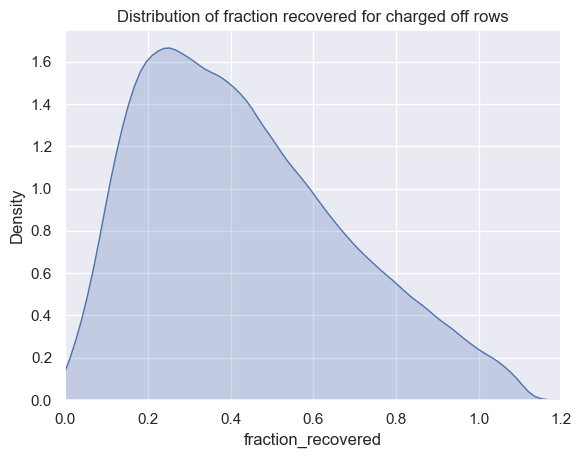

In [276]:
sns.kdeplot(
    data=testing_df["fraction_recovered"][testing_df["loan_status"] == "Charged Off"],
    label="Charged Off",
    shade=True,
)
plt.axis(xmin=0, xmax=1.2)
plt.title('Distribution of fraction recovered for charged off rows')
plt.show()

In [154]:
output_file = 'my_data.csv'
testing_df.to_csv(output_file, index=False)